<a href="https://www.kaggle.com/code/raymondraman/ifood-brain-team-data-challenge-for-data-analysts?scriptVersionId=221034269" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/ifood_df.csv
/kaggle/input/marketing-data/dictionary.png


In [2]:
data_dir = '/kaggle/input/marketing-data/ifood_df.csv'
df = pd.read_csv(data_dir)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [3]:
# Drop Z_CostContact and Z_Revenue as they are not useful
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [4]:
# Task1: Identify Gold and Regular product -> Ignore MntRegularProds & MntGoldProds
Products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
Categories = ['MntRegularProds', 'MntGoldProds']
print(df[Products + Categories + ['MntTotal']].head(15).to_string(index=False))

 MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntRegularProds  MntGoldProds  MntTotal
      635         88              546              172                88             1441            88      1529
       11          1                6                2                 1               15             6        21
      426         49              127              111                21              692            42       734
       11          4               20               10                 3               43             5        48
      173         43              118               46                27              392            15       407
      520         42               98                0                42              688            14       702
      235         65              164               50                49              536            27       563
       76         10               56                3                 1              12

Comparison between target and non-target customer

In [5]:
# Filter customer who accept the lastest offer
pd.set_option('display.width', 1000) # Adjust to your preference
target_customer_df = df[df['Response'] == 1].drop(['Response'], axis=1)
non_target_customer_df = df[df['Response'] == 0].drop(['Response'], axis=1)
print(target_customer_df[Products + Categories + ['MntTotal']].head())
print(non_target_customer_df[Products + Categories + ['MntTotal']].head())

    MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntRegularProds  MntGoldProds  MntTotal
0        635         88              546              172                88             1441            88      1529
8         14          0               24                3                 3               42             2        44
14      1006         22              115               59                68             1225            45      1270
31        96         12               96               33                22              216            43       259
37       437          8              206              160                49              818            42       860
   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntRegularProds  MntGoldProds  MntTotal
1        11          1                6                2                 1               15             6        21
2       426         49              127              111          

In [6]:
# Analyze the previous cmp acceptance rate in two customer groups
from collections import defaultdict
def find_accept_rate(df, total_num):
    accept_cmp = defaultdict(list)
    for i in range(1, 6):
        total_accept = sum(df[f'AcceptedCmp{i}'])
        accept_rate = total_accept/total_num*100
        accept_cmp[i] = accept_rate
    return accept_cmp
    
from collections import defaultdict
target_customer_len, non_target_customer_len = len(target_customer_df), len(non_target_customer_df)

# Find target customer accept rate 
target_customer_accept_cmp = find_accept_rate(target_customer_df, target_customer_len)
print(target_customer_accept_cmp)

# Find non-target customer accept rate 
non_target_customer_cmp = find_accept_rate(non_target_customer_df, non_target_customer_len)
print(non_target_customer_cmp)

defaultdict(<class 'list'>, {1: 23.723723723723726, 2: 6.006006006006006, 3: 23.123123123123122, 4: 18.61861861861862, 5: 27.32732732732733})
defaultdict(<class 'list'>, {1: 3.3653846153846154, 2: 0.5341880341880342, 3: 4.594017094017095, 4: 5.448717948717949, 5: 3.7393162393162394})


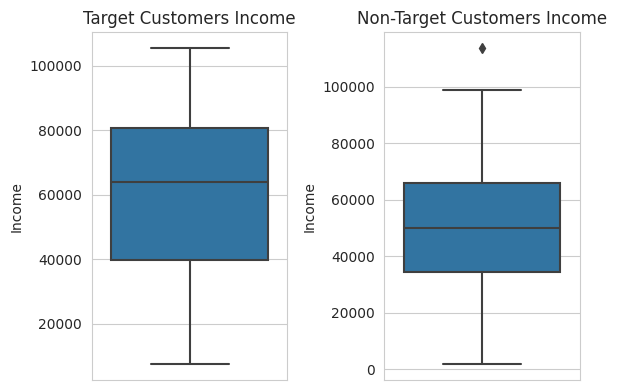

64090.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4)) 

sns.boxplot(y='Income', data=target_customer_df, ax=axes[0])
axes[0].set_title('Target Customers Income')  

sns.boxplot(y='Income', data=non_target_customer_df, ax=axes[1])
axes[1].set_title('Non-Target Customers Income')  

plt.tight_layout()  
plt.show()
print(target_customer_df['Income'].median())

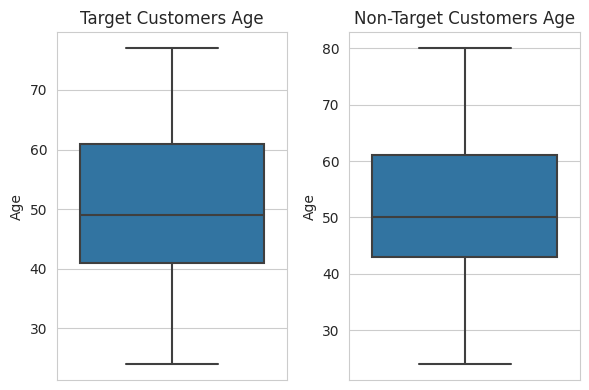

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4)) 

sns.boxplot(y='Age', data=target_customer_df, ax=axes[0])
axes[0].set_title('Target Customers Age')  

sns.boxplot(y='Age', data=non_target_customer_df, ax=axes[1])
axes[1].set_title('Non-Target Customers Age')  

plt.tight_layout()  
plt.show()

In [9]:
# Analyze the kidhome in two customer groups
from collections import defaultdict
def find_kidhome(df):
    kidhome_dict = defaultdict(int)
    ROWS = len(df)
    for i in range(ROWS):
        kid = df.iloc[i]
        kidhome_dict[kid] += 1 
    return kidhome_dict
    
# Find target customer kids
target_customer_kidhome = find_kidhome(target_customer_df['Kidhome'])
print(target_customer_kidhome)
# Find non-target customer kids
non_target_customer_kidhome = find_kidhome(non_target_customer_df['Kidhome'])
print(non_target_customer_kidhome)

defaultdict(<class 'int'>, {0: 221, 1: 110, 2: 2})
defaultdict(<class 'int'>, {1: 773, 0: 1055, 2: 44})


In [10]:
# Analyze the Teenhome in two customer groups
from collections import defaultdict
def count_uniq_num(df):
    res_dict = defaultdict(int)
    ROWS = len(df)
    for i in range(ROWS):
        val = df.iloc[i]
        res_dict[val] += 1 
    return res_dict
    
# Find target customer kids
target_customer_Teenhome = count_uniq_num(target_customer_df['Teenhome'])
print(target_customer_Teenhome)
# Find non-target customer kids
non_target_customer_Teenhome = count_uniq_num(non_target_customer_df['Teenhome'])
print(non_target_customer_Teenhome)

defaultdict(<class 'int'>, {0: 236, 2: 5, 1: 92})
defaultdict(<class 'int'>, {1: 923, 0: 903, 2: 46})


In [11]:
Education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
print(target_customer_df[Education].sum())
print(non_target_customer_df[Education].sum())

education_2n Cycle       22
education_Basic           2
education_Graduation    152
education_Master         56
education_PhD           101
dtype: int64
education_2n Cycle      176
education_Basic          52
education_Graduation    961
education_Master        308
education_PhD           375
dtype: int64


In [12]:
Marital_status = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
print(target_customer_df[Marital_status].sum())
print(non_target_customer_df[Marital_status].sum())

marital_Divorced     48
marital_Married      98
marital_Single      109
marital_Together     60
marital_Widow        18
dtype: int64
marital_Divorced    182
marital_Married     756
marital_Single      368
marital_Together    508
marital_Widow        58
dtype: int64


In [13]:
Products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']
print(target_customer_df[Products].sum())
print(non_target_customer_df[Products].sum())

MntWines            167371
MntFruits            12634
MntMeatProducts      97824
MntFishProducts      17221
MntSweetProducts     12778
dtype: int64
MntWines            507722
MntFruits            45585
MntMeatProducts     266689
MntFishProducts      66032
MntSweetProducts     47040
dtype: int64


In [14]:
Channels = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
print(target_customer_df[Channels].sum())
print(non_target_customer_df[Channels].sum())

NumDealsPurchases       779
NumWebPurchases        1689
NumCatalogPurchases    1399
NumStorePurchases      2025
dtype: int64
NumDealsPurchases       4333
NumWebPurchases         7353
NumCatalogPurchases     4434
NumStorePurchases      10816
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Recency', ylabel='Count'>

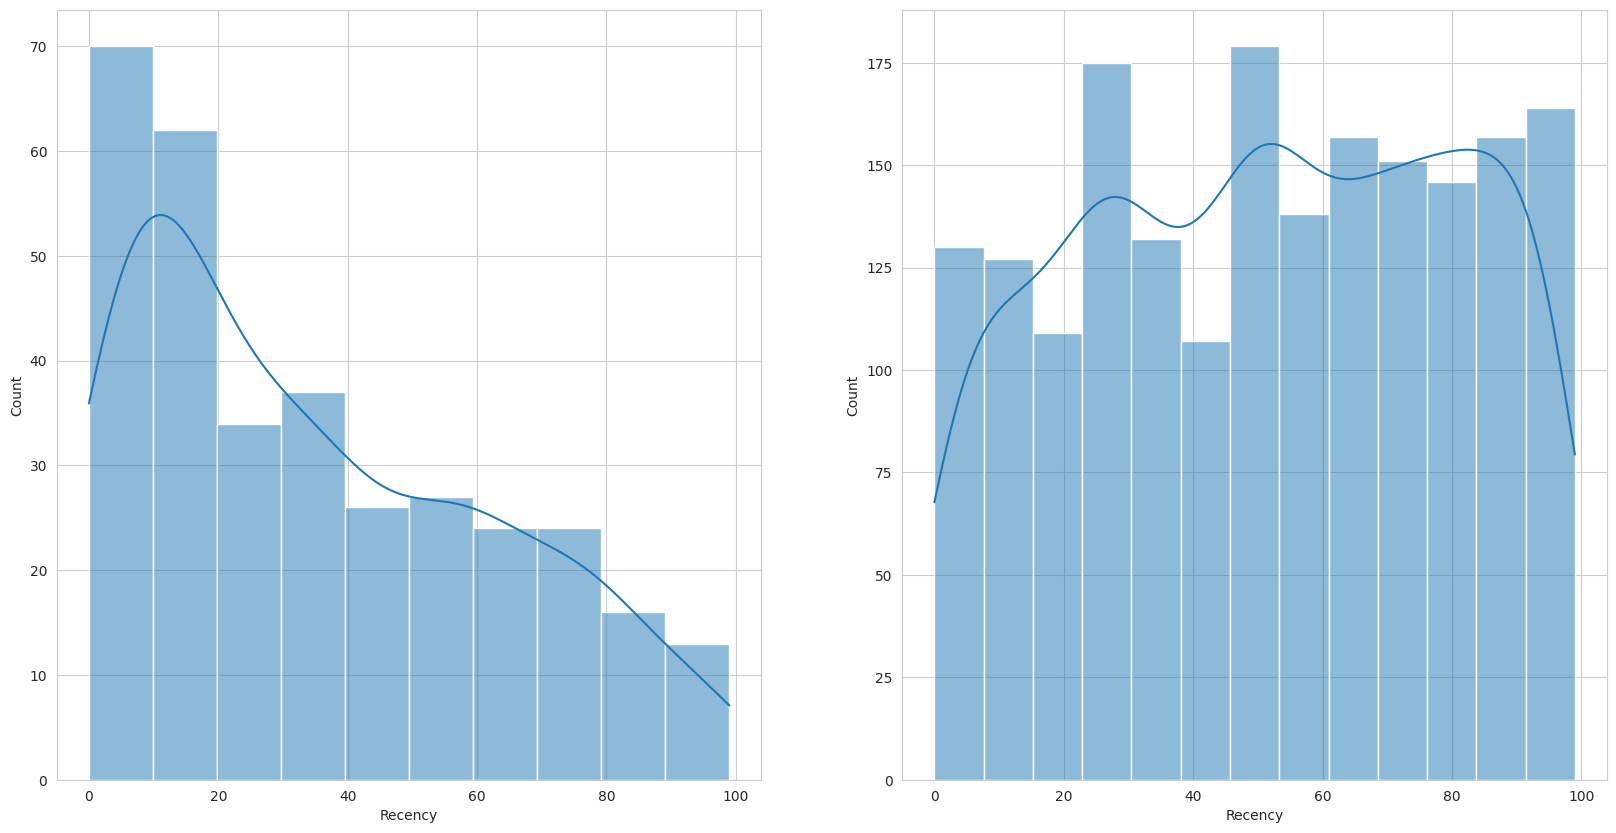

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(data=target_customer_df, x='Recency', kde=True, ax=ax[0])
sns.histplot(data=non_target_customer_df, x='Recency', kde=True, ax=ax[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Customer_Days', ylabel='Count'>

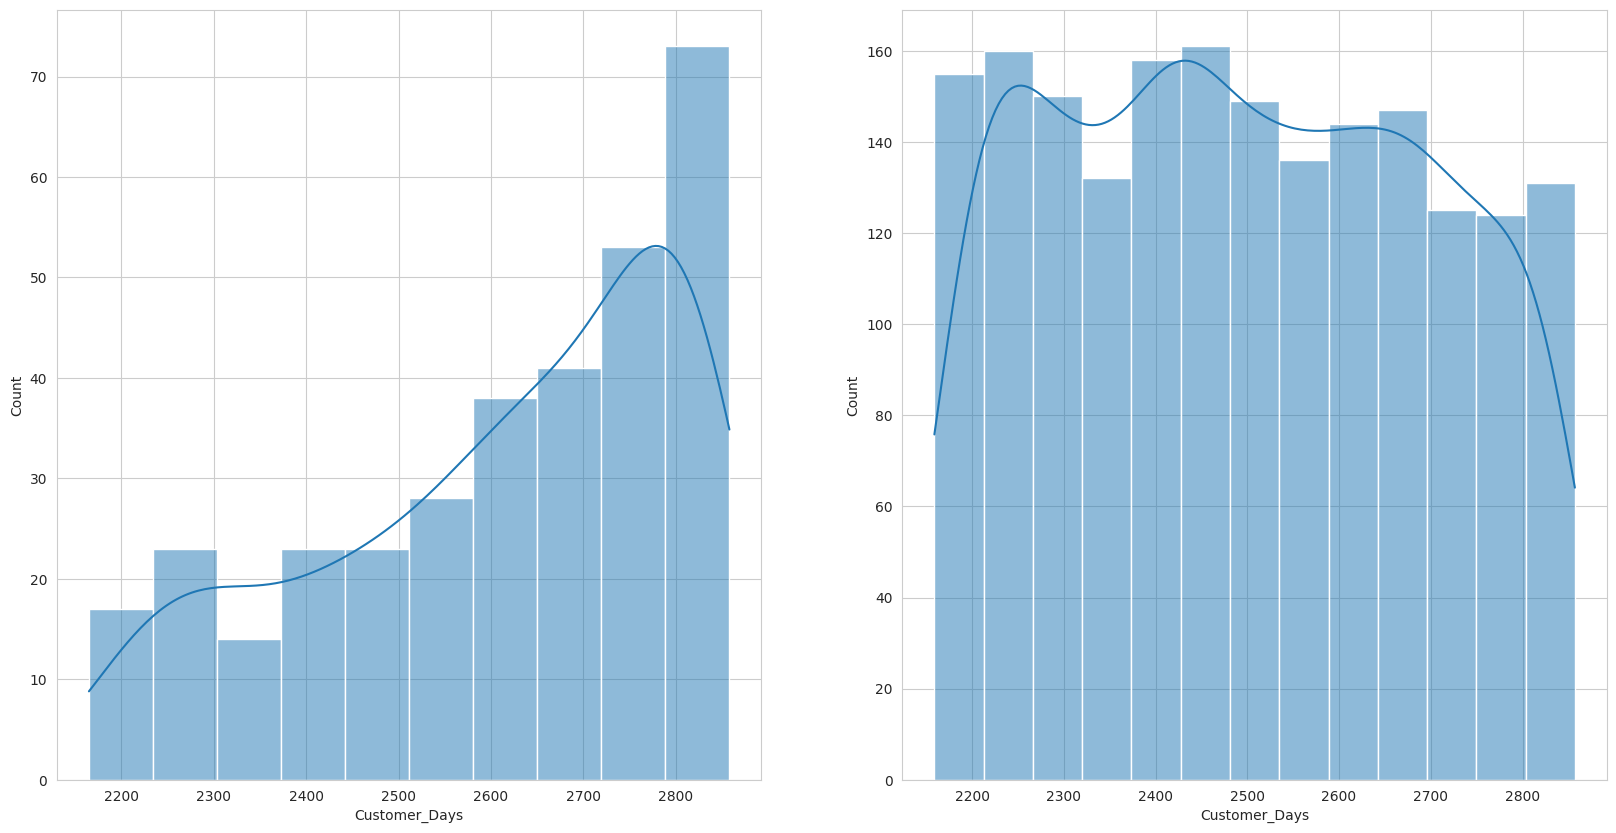

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(data=target_customer_df, x='Customer_Days', kde=True, ax=ax[0])
sns.histplot(data=non_target_customer_df, x='Customer_Days', kde=True, ax=ax[1])

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

filtered_df = df[
    (df['AcceptedCmp1'] == 1) |
    (df['AcceptedCmp3'] == 1) |
    (df['AcceptedCmp5'] == 1) | 
    (df['Income'] >= 64090.0) | 
    (df['Kidhome'] == 0) | 
    (df['Teenhome'] == 0) | 
    (df['marital_Single'] == 1) |
    (df['Recency'] <= 30.0) |
    (df['Customer_Days'] >= 2651.0) 
]

selected_features = filtered_df[[
    'AcceptedCmp1',
    'AcceptedCmp3',   
    'AcceptedCmp5',
    'Income',
    'Kidhome',
    'Teenhome',
    'marital_Single',
    'Recency',
    'Customer_Days'
]]

from sklearn.linear_model import LogisticRegression
labels = filtered_df['Response']
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, test_size=0.8, random_state=5)


logistic_model = LogisticRegression(max_iter=200, random_state=5)
logistic_model.fit(X_train, y_train)

logistic_predictions = logistic_model.predict(X_test)

# Calculate accuracy for the logistic regression model
logistic_accuracy = metrics.accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")

Logistic Regression Accuracy: 0.88


In [18]:
tn_logistic, fp_logistic, fn_logistic, tp_logistic = metrics.confusion_matrix(y_test, logistic_predictions).ravel()
print(f"Logistic Regression - False Positive: {fp_logistic}, False Negative: {fn_logistic}")

Logistic Regression - False Positive: 40, False Negative: 167


In [19]:


rf_model = RandomForestClassifier(random_state=5)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rf_predictions)
print(f"Accuracy: {rf_accuracy:.2f}")

Accuracy: 0.85


In [20]:
tn_rf, fp_rf, fn_rf, tp_rf = metrics.confusion_matrix(y_test, rf_predictions).ravel()
print(f"Random Forest - False Positive: {fp_rf}, False Negative: {fn_rf}")

Random Forest - False Positive: 74, False Negative: 174
